# SPEX in a Jupyter notebook

When the SPEX package is installed and loaded in the environment successfully,
it should be available in Python and Jupyter. In a Python or Jupyter session,
SPEX can be started like this:

In [1]:
from pyspex.spex import Session
s=Session()

 Welcome jellep to SPEX version 3.07.03
 
 NEW in this version of SPEX: 
01-12-2022 Fixed issue with plot cap command
05-12-2022 Fixed issue with knak model
22-03-2023 Fixed issue with treatment of bad quality bins in trafo
23-03-2023 Fixed small issues in the pyspex interface
 
 Currently using SPEXACT version 2.07.00. Type `help var calc` for details.


## Loading data

The object `s` now contains the SPEX program. Through `s` we can send commands
to SPEX and sometimes get data in return. The commands are very similar to the
commands used on the SPEX command line.

As a first step, we can load the data files. This is done using the 
[s.data()](https://spex-xray.github.io/spex-help/pyspex/com_data.html#data) command.
The command first expects the response file (with the `.res` extension) and
then the spectrum file (`.spo` extension). If you have a file called ``powerl.spo``
and ``powerl.res`` then you type:

In [2]:
s.data("powerl.res","powerl.spo")

0

## Plotting the data

If the [s.data()](https://spex-xray.github.io/spex-help/pyspex/com_data.html#data)
command was successful, we can now have a look at the
spectra. Using default settings, the easiest way of plotting a spectrum is
as follows:

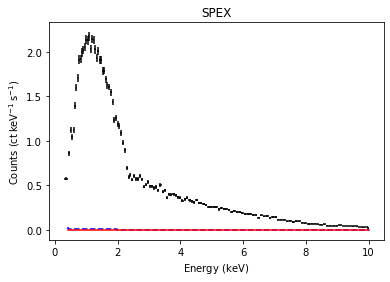

In [3]:
s.plot_data()

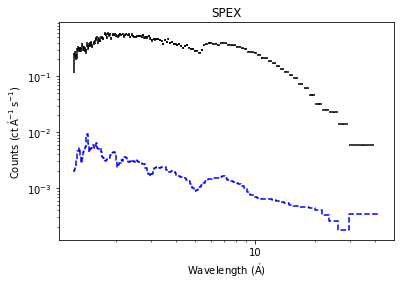

In [4]:
s.plot_data(xlog=True, ylog=True, wave=True)

To make sure the axes are logarithmic, we provide the options (``xlog=True`` and
``ylog=True``) and change the axes to unit Å using ``wave=True``.

If you want to change more features of the plot, you can get the
matplotlib ``plt`` object from the command like this:

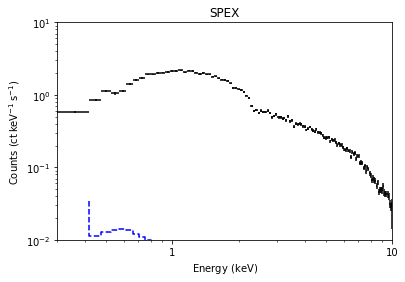

In [5]:
(pdata, plt) = s.plot_data(xlog=True,ylog=True,show=False)
plt.xlim(0.3,10.0)
plt.ylim(0.01,10.)
plt.show()

## Ignoring and rebinning

High-resolution X-ray spectra from Chandra and XMM-Newton are usually
oversampled (e.g. the energy bins are much smaller than the spectral
resolution) and contain a lot more channels then is useful. Therefore,
it is necessary to remove wavelength intervals which contain bad data
and rebin your spectrum. The SPEX command to ignore parts of the spectrum
is called [s.ignore()](https://spex-xray.github.io/spex-help/pyspex/com_data.html#data-selection)
and the command to rebin is called [s.bin()](https://spex-xray.github.io/spex-help/pyspex/com_data.html#binning-and-data-selection).
In the next example we bin the spectrum over the 0.5 to 10 keV range with
a factor of 5 and ignore the rest of the spectrum:

In [6]:
s.ignore(1, 1, 0.0, 0.5, unit='kev')
s.ignore(1, 1, 10.0, 1000., unit='kev')
s.bin(1, 1, 0.5, 10.0, 5, unit='kev')

The [s.ignore()](https://spex-xray.github.io/spex-help/pyspex/com_data.html#data-selection)
and [s.bin(](https://spex-xray.github.io/spex-help/pyspex/com_data.html#binning-and-data-selection)
commands need to know which spectrum in the
data structure you want to change. If you just loaded one spectrum, this is
easy. SPEX organizes spectra in instruments and regions. The first spectrum
is by default in instrument 1 and region 1. The first two places in the
[s.ignore()](https://spex-xray.github.io/spex-help/pyspex/com_data.html#data-selection)
and [s.bin()](https://spex-xray.github.io/spex-help/pyspex/com_data.html#binning-and-data-selection)
commands need to contain the instrument number and
the region number of the spectrum that you want to change.

The third and forth number is the energy range to apply the command to. So,
the third number is the minimum energy and the forth the maximum.

For the bin command, the binning factor is the fifth entry. Finally, we
provide the unit of our energy values as `unit='kev'` in the last entry
of the command.


## Defining a model

Now we have a clean and rebinned spectrum that is ready to fit. Before
we can start fitting, we first need to define a model. The model can contain
one or more of these components:

-  `absm` Model for interstellar absorption.

-  `reds` Redshift.

-  `po` Powerlaw.

And [there are more](https://spex-xray.github.io/spex-help/models.html)
The following command sequence defines a simple powerlaw model at a certain
redshift and absorbed by the interstellar medium. The individual components
of the model are loaded one-by-one with the 
[s.com()](https://spex-xray.github.io/spex-help/pyspex/com_model.html#components)
command:

In [7]:
import numpy
s.com('reds')
s.com('absm')
s.com('po')
s.com_rel(1,3,numpy.array([1,2]))

 You have defined    1 component.
 You have defined    2 components.
 You have defined    3 components.


The last command [`s.com_rel(1,3,numpy.array([1,2])`](https://spex-xray.github.io/spex-help/pyspex/com_model.html#component-relate)
tells SPEX that component 3, the powerlaw, is first redshifted by component 1
and then absorbed by component 2. The order of the 1 and the 2 is
important! Always think what happens in which order on the way from
the source to the telescope.

## Distance

For most sources the distance is more or less known. To get a right
luminosity estimate for the source, the expected distance has to be
provided to SPEX. This is done with the 
[s.distance()](https://spex-xray.github.io/spex-help/pyspex/com_model.html#distance)
command:


In [8]:
s.dist(1, 0.1, 'z')

 Distances assuming H0 =  70.0 km/s/Mpc, Omega_m = 0.300 Omega_Lambda = 0.700 Omega_r = 0.000
Sector       m      A.U.        ly        pc       kpc       Mpc  redshift        cz   age(yr)
----------------------------------------------------------------------------------------------
   1 1.420E+25 9.494E+13 1.501E+09 4.603E+08 4.603E+05  460.3001    0.1000   29979.3 1.301E+09
----------------------------------------------------------------------------------------------



With this command, the distance to the source is set to a redshift of
0.1.

## Setting initial parameters

Now we have to estimate the initial parameters. With the command
[s.par_show()](https://spex-xray.github.io/spex-help/pyspex/com_model.html#show-parameters)
we can see which parameters there are:


In [9]:
s.par_show()

---------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit      value     status    minimum   maximum lsec lcom lpar

   1    1 reds z    Redshift                 0.00000   frozen       -1.0   1.0E+10           
   1    1 reds flag Flag: cosmo=0, vel=1     0.00000   frozen        0.0       1.0           

   1    2 absm nh   Column (1E28/m**2)   0.000100000   thawn         0.0   1.0E+20           
   1    2 absm fcov Covering fraction        1.00000   frozen        0.0       1.0           

   1    3 pow  norm Norm (1E44 ph/s/keV)     1.00000   thawn         0.0   1.0E+20           
   1    3 pow  gamm Photon index             2.00000   thawn        -10.       10.           
   1    3 pow  dgam Photon index break       0.00000   frozen       -10.       10.           
   1    3 pow  e0   Break energy (keV)   1.00000E+10   frozen        0.0   1.0E+20           
   1    3 pow  b    Break strength           0.

We can set the parameters using the [s.par()](https://spex-xray.github.io/spex-help/pyspex/com_model.html#setting-parameters)
command. The commands then look like this:

In [10]:
s.par(1, 1, 'z', 0.1)
s.par(1, 2, 'nh', 2.E-3, thawn=False)
s.par(1, 3, 'norm', 1.E+9, thawn=True)
s.par(1, 3, 'gamm', 1.5, thawn=True)

When the parameter should be free during the fit, then add the optional `thawn=True` parameter
to the command. Then, we run [s.par_show()](https://spex-xray.github.io/spex-help/pyspex/com_model.html#show-parameters)
again to see what happened:

In [11]:
s.par_show()

---------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit      value     status    minimum   maximum lsec lcom lpar

   1    1 reds z    Redshift                0.100000   frozen       -1.0   1.0E+10           
   1    1 reds flag Flag: cosmo=0, vel=1     0.00000   frozen        0.0       1.0           

   1    2 absm nh   Column (1E28/m**2)    0.00200000   frozen        0.0   1.0E+20           
   1    2 absm fcov Covering fraction        1.00000   frozen        0.0       1.0           

   1    3 pow  norm Norm (1E44 ph/s/keV) 1.00000E+09   thawn         0.0   1.0E+20           
   1    3 pow  gamm Photon index             1.50000   thawn        -10.       10.           
   1    3 pow  dgam Photon index break       0.00000   frozen       -10.       10.           
   1    3 pow  e0   Break energy (keV)   1.00000E+10   frozen        0.0   1.0E+20           
   1    3 pow  b    Break strength           0.

Finding the right initial values for the parameters is a game of trial
and error. To see whether you are going in the right direction, you can
calculate the model with the command [s.calc()](https://spex-xray.github.io/spex-help/pyspex/com_model.html#calculate)
see the result with [s.plot_data()](https://spex-xray.github.io/spex-help/pyspex/com_plot.html#plot-data)
If you see the model appear in your screen, then the model
is close enough to be fitted. Especially the normalization of the powerlaw
(`norm`) can vary a lot depending on the count rate of the source.

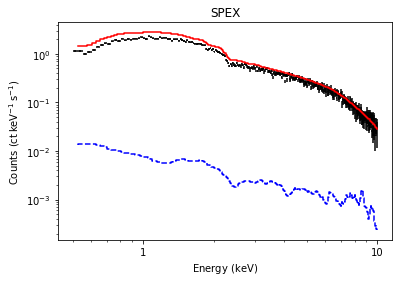

In [12]:
s.calc()
s.plot_data(xlog=True,ylog=True)

## Fitting the data

We are ready to fit the data! You can give the [s.fit()](https://spex-xray.github.io/spex-help/pyspex/com_opt.html#fit)
command to start fitting. When the fit is done, then the parameters and C-stat are
printed on screen. If the C-stat value is
close to the expected C-stat value, then your fit is acceptable.
Sometimes more runs of the command [s.fit()](https://spex-xray.github.io/spex-help/pyspex/com_opt.html#fit) are
necessary after changing some initial parameters. This is especially true
when using complex models. Again this is a game of trial and error.



 fit iter  100                                                   
   5094.14              3  1.000E+09   1.50
 You cannot plot this frame since nothing is defined
 
   552.978              6  7.326E+08   1.41
 You cannot plot this frame since nothing is defined
 
   432.439              9  7.554E+08   1.40
 You cannot plot this frame since nothing is defined
 
   432.434             12  7.557E+08   1.40
 You cannot plot this frame since nothing is defined
 
--------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit     value      status    minimum   maximum lsec lcom lpar

   1    1 reds z    Redshift             0.1000000     frozen   -1.0      1.00E+10
   1    1 reds flag Flag: cosmo=0, vel=1  0.000000     frozen    0.0       1.0

   1    2 absm nh   Column (1E28/m**2)   2.0000001E-03 frozen    0.0      1.00E+20
   1    2 absm fcov Covering fraction     1.000000     frozen    0.0       1.0

   1    3 

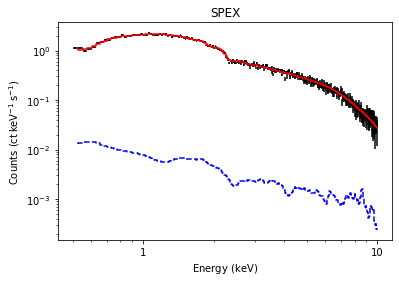

In [13]:
s.fit()
s.plot_data(xlog=True,ylog=True)

You also might want to fix or free certain parameters to see if they can
be constrained. You can fix a parameter with the command [s.par_fix()](https://spex-xray.github.io/spex-help/pyspex/com_model.html#fix-free-parameters) 
and freeing is done with [s.par_free()](https://spex-xray.github.io/spex-help/pyspex/com_model.html#fix-free-parameters)
(also called thawn). You can free the redshift and fix the N<sub>H</sub> by
the following commands:


 fit iter  100                                                   
   432.434              4  2.000E-03  7.557E+08   1.40
 You cannot plot this frame since nothing is defined
 
   431.817              8  1.973E-03  7.503E+08   1.40
 You cannot plot this frame since nothing is defined
 
   431.817             12  1.973E-03  7.503E+08   1.40
 You cannot plot this frame since nothing is defined
 
--------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit     value      status    minimum   maximum lsec lcom lpar

   1    1 reds z    Redshift             0.1000000     frozen   -1.0      1.00E+10
   1    1 reds flag Flag: cosmo=0, vel=1  0.000000     frozen    0.0       1.0

   1    2 absm nh   Column (1E28/m**2)   1.9729910E-03 thawn     0.0      1.00E+20
   1    2 absm fcov Covering fraction     1.000000     frozen    0.0       1.0

   1    3 pow  norm Norm (1E44 ph/s/keV) 7.5028909E+08 thawn     0.0      1.0

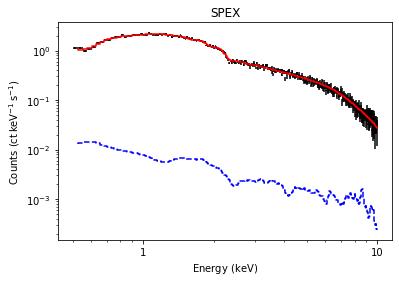

In [14]:
s.par_free(1,2,'nh')
s.fit()
s.plot_data(xlog=True,ylog=True)

## Calculating errors

When the fit is acceptable, you might want to know the uncertainties on
your fitted parameters. Errors are determined one-by-one by fixing the
parameter to some value and calculate the ΔC-stat with
respect to the best fit. If you want to know the 1σ error
on the parameter, you need to know its values at ΔC-stat = 1. 
This is done by the [s.error()](https://spex-xray.github.io/spex-help/pyspex/com_opt.html#error) 
command. You can calculate the error for each parameter. For example the powerlaw slope:

In [15]:
gamm_err = s.error(1,3,'gamm')
print(gamm_err.value,gamm_err.lerr,gamm_err.uerr)

1.399532437324524 -0.007902383804321289 0.007928133010864258
 Parameter        Statistics       Delta          Delta
   value            value        parameter      statistics
----------------------------------------------------------
   1.39637          431.98     -3.162861E-03    0.16
   1.39163          432.82     -7.902384E-03    1.00
   1.40270          431.98      3.162861E-03    0.16
   1.40746          432.82      7.928133E-03    1.00
 Parameter   1    3 gamm:    1.3995     Errors:  -7.90238E-03 ,   7.92813E-03
